In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
import  numpy as np
from PIL import Image
import requests

In [ ]:
#Reading from CSV
fakeData = pd.read_csv("DataSet_Misinfo_FAKE.csv")
trueData = pd.read_csv("DataSet_Misinfo_TRUE.csv")
# print(fakeData.head())

In [ ]:
#Reading from JSON
fakeData = pd.read_json("FakeNE.json")
# for i in fakeData:
#   for j in fakeData:
#     print(fakeData[i][j])
print(fakeData.head())

          0       1        2           3           4          5       6    \
0      Sergei     ##k    ##rip        ##al       Trump       None    None   
1  Republican  Donald    Trump         New        York        New    York   
2         ##7   Japan   German       Frank      Walter      Stein   ##mei   
3     Swedish    Left    Party     Swedish  Statistics     Office  Sweden   
4         NFL     NFL  Defense  Department          US  Americans     NFL   

      7        8        9    ...   367   368   369   370   371   372   373  \
0    None     None     None  ...  None  None  None  None  None  None  None   
1   Trump       Mi     ##tt  ...  None  None  None  None  None  None  None   
2  Russia  Ukraine    Syria  ...  None  None  None  None  None  None  None   
3    None     None     None  ...  None  None  None  None  None  None  None   
4   Obama   Dallas  Cowboys  ...  None  None  None  None  None  None  None   

    374   375   376  
0  None  None  None  
1  None  None  None  
2 

In [ ]:
#Removing Hashtags
import re

for i in fakeData:
  for j in fakeData:
    fakeData[i][j] = re.sub(r'#', '', str(fakeData[i][j]))
print(fakeData.head())
stopwords=''
comment_words = str(fakeData)

          0       1        2           3           4          5       6    \
0      Sergei       k      rip          al       Trump                      
1  Republican  Donald    Trump         New        York        New    York   
2           7   Japan   German       Frank      Walter      Stein     mei   
3     Swedish    Left    Party     Swedish  Statistics     Office  Sweden   
4         NFL     NFL  Defense  Department          US  Americans     NFL   

      7        8        9    ... 367 368 369 370 371 372 373 374 375 376  
0                            ...                                          
1   Trump       Mi       tt  ...                                          
2  Russia  Ukraine    Syria  ...                                          
3                            ...                                          
4   Obama   Dallas  Cowboys  ...                                          

[5 rows x 377 columns]


In [ ]:
#removing the stopwords (for the case we are reading from the JSON file)
comment_words = '' 
stopwords = set(STOPWORDS)

for val in fakeData: 
      
    val = str(val)
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [ ]:
#removing the stopwords (for the case we are reading from the csv file)
comment_words = '' 
stopwords = set(STOPWORDS)

for val in fakeData.text: 
      
    val = str(val)
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [ ]:
pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, mask = pic, 
                min_font_size = 10).generate(comment_words)

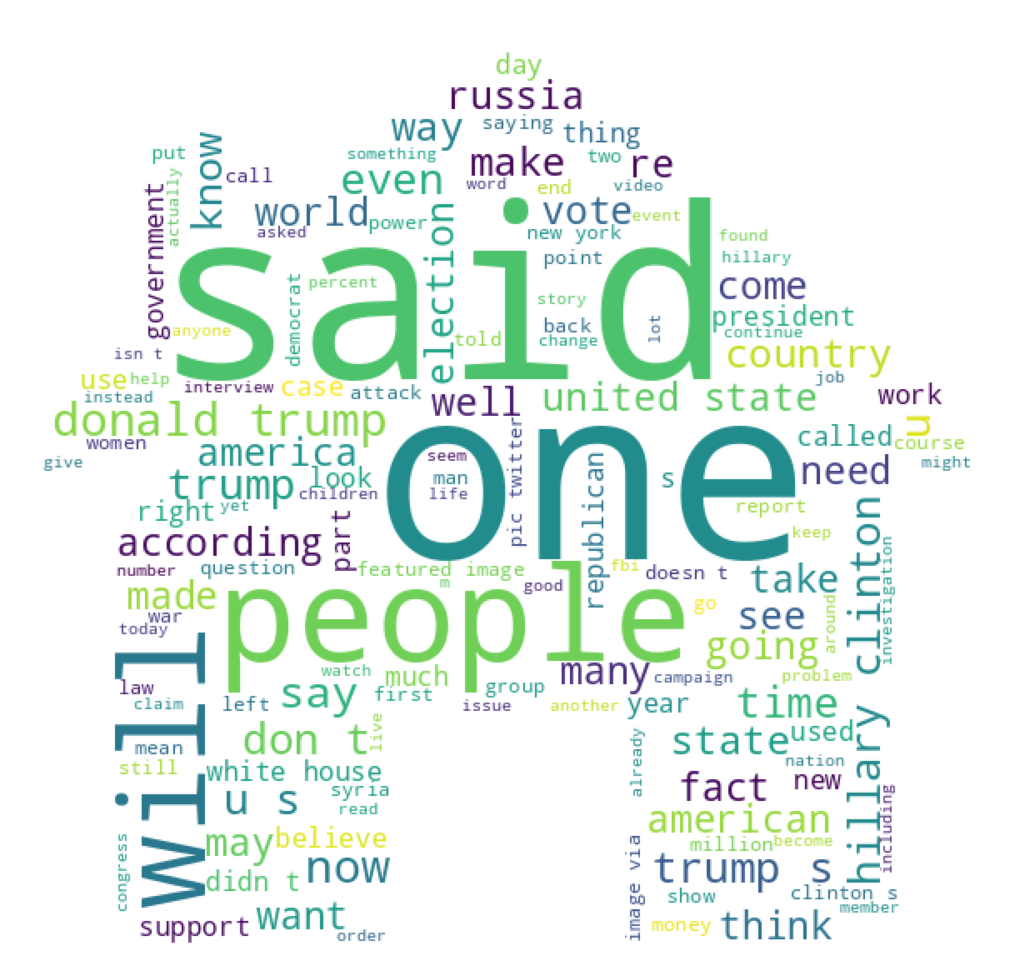

In [ ]:
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()